In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data_sets/Raw-GPS-data-Kandy-Buses/segment/merged_segements_10T.csv')

In [ ]:
from google.colab import files
def download_csv(data,filename):
  filename= filename + '.csv'
  data.to_csv(filename, encoding = 'utf-8-sig',index= False)
  files.download(filename)

In [ ]:
data.head()

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,max_speed,speed_variation,elevation_p,elevation_n,ele_X_speed_acc_p,ele_X_speed_acc_n,average_acceleration,average_deacceleration,std_acc_dacc,stop_count
0,2021-10-16 07:08:31,2021-10-16 07:18:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,35.6372,117.835732,0.034371,-0.048169,5.618765,15.764998,0.603900,-1.230988,1.021837,4
1,2021-10-16 07:18:31,2021-10-16 07:28:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,32.9374,56.681460,0.039847,-0.039004,10.944814,8.906415,0.442037,-0.663055,0.759768,4
2,2021-10-16 07:28:31,2021-10-16 07:38:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,21.0583,52.184052,0.049139,-0.050695,6.122113,10.405097,0.434465,-0.626983,0.648791,7
3,2021-10-16 07:38:31,2021-10-16 07:48:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,24.8380,47.224719,0.040474,-0.045044,13.899388,5.383102,0.335428,-0.522203,0.525860,2
4,2021-10-16 07:48:31,2021-10-16 07:58:31,1.0,116,2021-10-16,BT02,BT01,2,5,7,...,17.8186,13.377603,0.032281,-0.043973,3.570260,5.446139,0.298263,-0.326129,0.405536,0


In [ ]:
data.iloc[0].to_json()

'{"segment_starting_time":"2021-10-16 07:08:31","segment_ending_time":"2021-10-16 07:18:31","trip_id":1.0,"deviceid":116,"date":"2021-10-16","start_terminal":"BT02","end_terminal":"BT01","direction":2,"day_of_week":5,"hour_of_day":7,"segment_id":1,"average_speed":17.5666113333,"max_speed":35.6372,"speed_variation":117.8357318355,"elevation_p":0.0343710201,"elevation_n":-0.0481691527,"ele_X_speed_acc_p":5.6187648915,"ele_X_speed_acc_n":15.7649983612,"average_acceleration":0.6038996316,"average_deacceleration":-1.2309878085,"std_acc_dacc":1.0218371764,"stop_count":4}'

In [ ]:
data.columns

Index(['segment_starting_time', 'segment_ending_time', 'trip_id', 'deviceid',
       'date', 'start_terminal', 'end_terminal', 'direction', 'day_of_week',
       'hour_of_day', 'segment_id', 'average_speed', 'max_speed',
       'speed_variation', 'elevation_p', 'elevation_n', 'ele_X_speed_acc_p',
       'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration',
       'std_acc_dacc', 'stop_count'],
      dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import missingno as msno

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy['start_terminal'] = data_copy['start_terminal'].replace({'BT01': 1, 'BT02': 2})
data_copy['end_terminal'] = data_copy['end_terminal'].replace({'BT01': 1, 'BT02': 2})

In [ ]:
# Select the relevant features
selected_features = ['segment_starting_time', 'segment_ending_time', 'trip_id', 'deviceid', 'date', 'start_terminal',
                      'end_terminal', 'direction', 'day_of_week', 'hour_of_day', 'segment_id', 'average_speed',
                      'max_speed', 'speed_variation', 'elevation_p', 'elevation_n', 'ele_X_speed_acc_p',
                      'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc',
                      'stop_count']
# Separate datetime columns
drop_list = []
temp_list = []
datetime_columns = ['segment_starting_time', 'segment_ending_time', 'date']
id_columns_list = ['trip_id', 'segment_id','deviceid']
catogorical_columns_list = ['start_terminal','end_terminal','direction']
temp_list.extend(datetime_columns)
temp_list.extend(id_columns_list)
temp_list.extend(catogorical_columns_list)

numerical_features = [col for col in selected_features if col not in temp_list]

In [ ]:
numerical_features

['day_of_week',
 'hour_of_day',
 'average_speed',
 'max_speed',
 'speed_variation',
 'elevation_p',
 'elevation_n',
 'ele_X_speed_acc_p',
 'ele_X_speed_acc_n',
 'average_acceleration',
 'average_deacceleration',
 'std_acc_dacc',
 'stop_count']

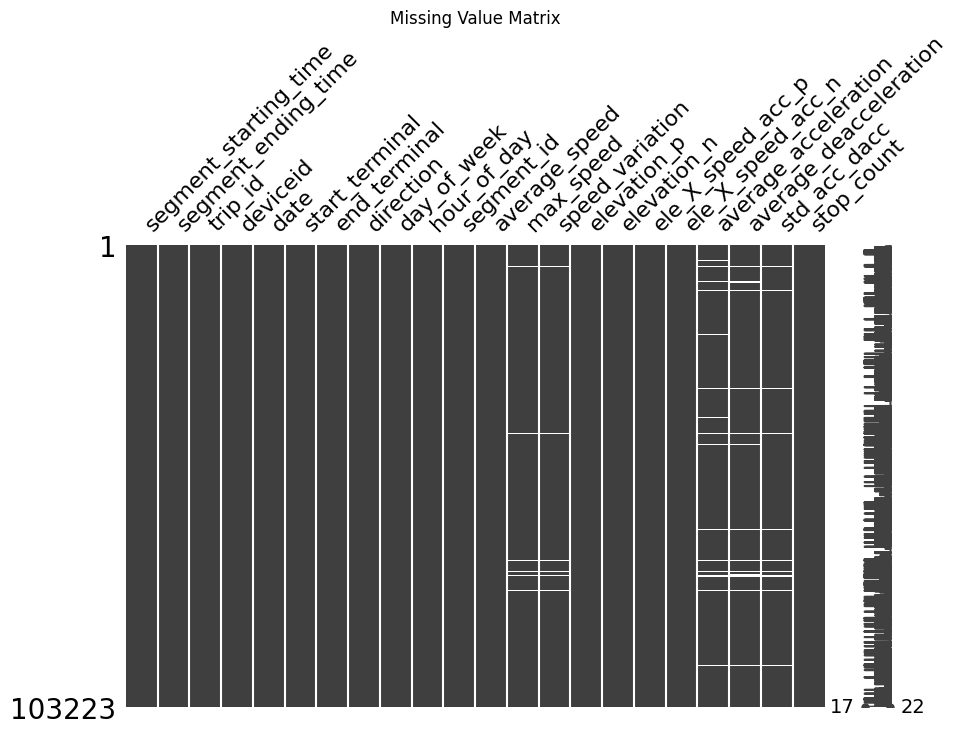

In [ ]:
# Visualize missing values using a heatmap
msno.matrix(data_copy, figsize=(10, 6))
plt.title('Missing Value Matrix')
plt.show()

In [ ]:
df_cleaned = data_copy.dropna()
# Reset the index to make it consecutive integers
df_cleaned = df_cleaned.reset_index(drop=True)

In [ ]:
# Standardize numerical features only
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [ ]:
cluster_column = []
cluster_column.extend(numerical_features)
cluster_column.extend(catogorical_columns_list)

In [ ]:
cluster_column

['day_of_week',
 'hour_of_day',
 'average_speed',
 'max_speed',
 'speed_variation',
 'elevation_p',
 'elevation_n',
 'ele_X_speed_acc_p',
 'ele_X_speed_acc_n',
 'average_acceleration',
 'average_deacceleration',
 'std_acc_dacc',
 'stop_count',
 'start_terminal',
 'end_terminal',
 'direction']

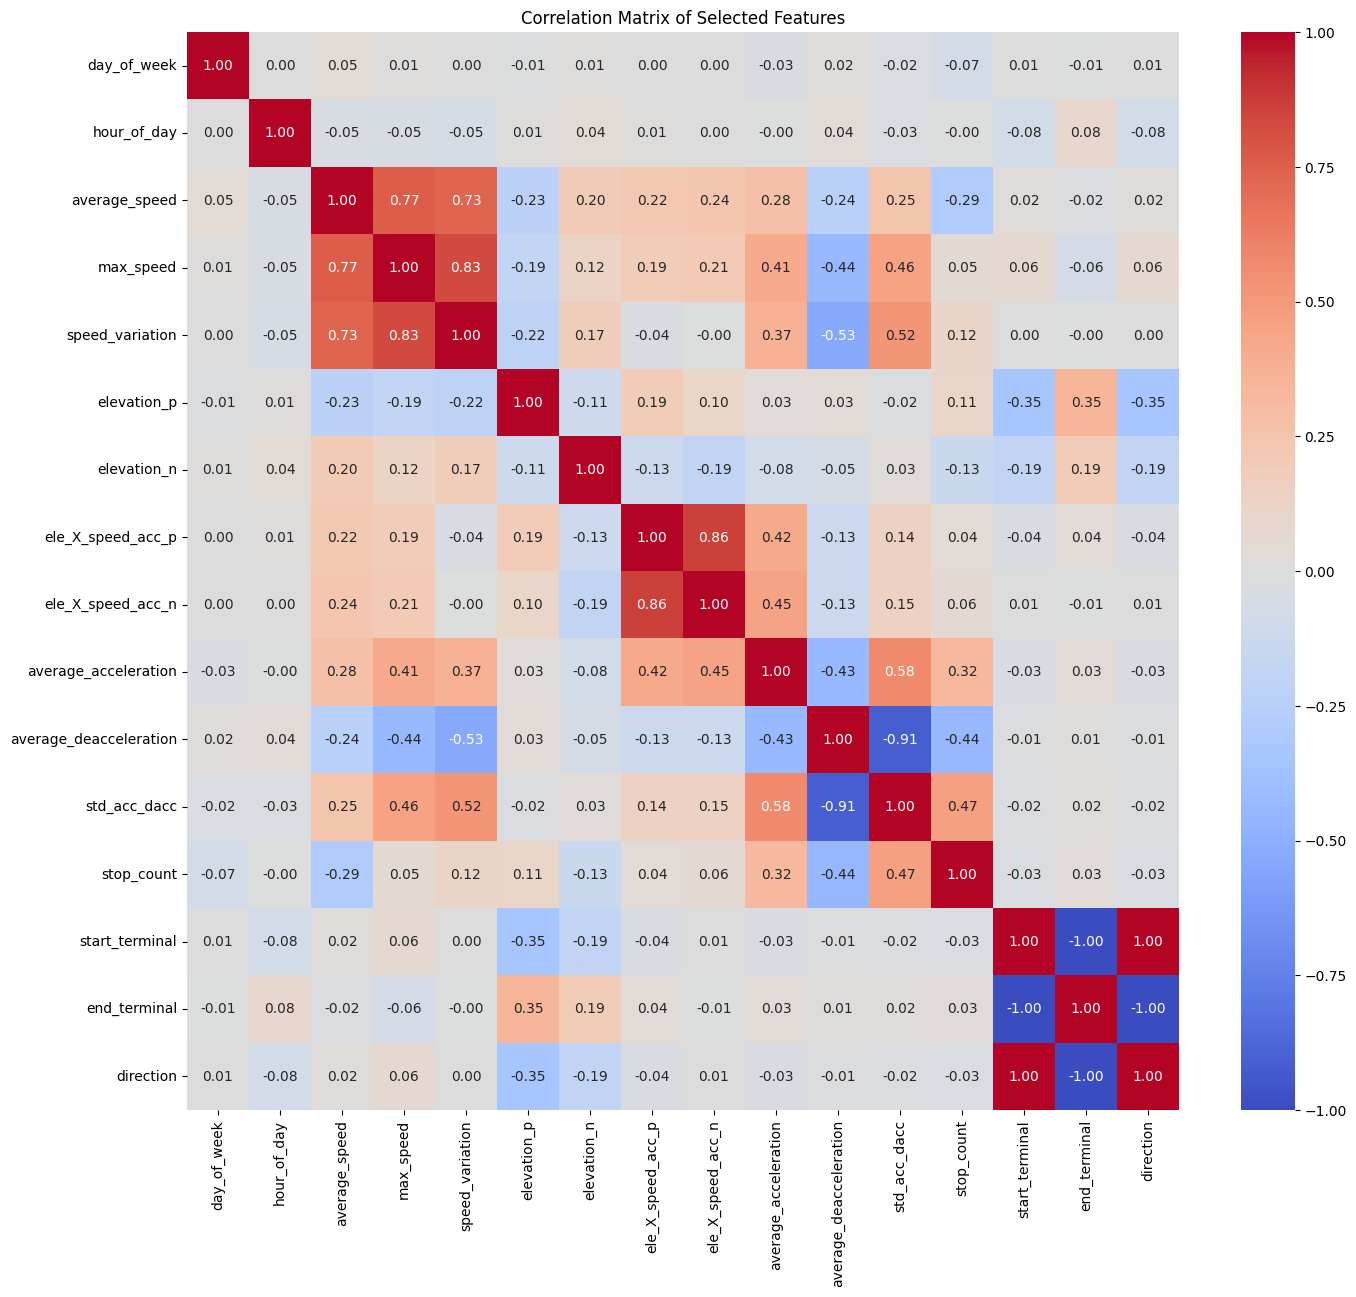

In [ ]:
correlation_matrix = df_cleaned[cluster_column].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
# Apply PCA for dimensionality reduction
n_components = 3  # You can adjust this based on the desired number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_cleaned[cluster_column])

In [ ]:
# Apply Spectral Clustering
n_clusters = 3  # You can adjust this based on the number of clusters in your data
spectral = SpectralClustering(n_clusters=n_clusters,affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X_pca)

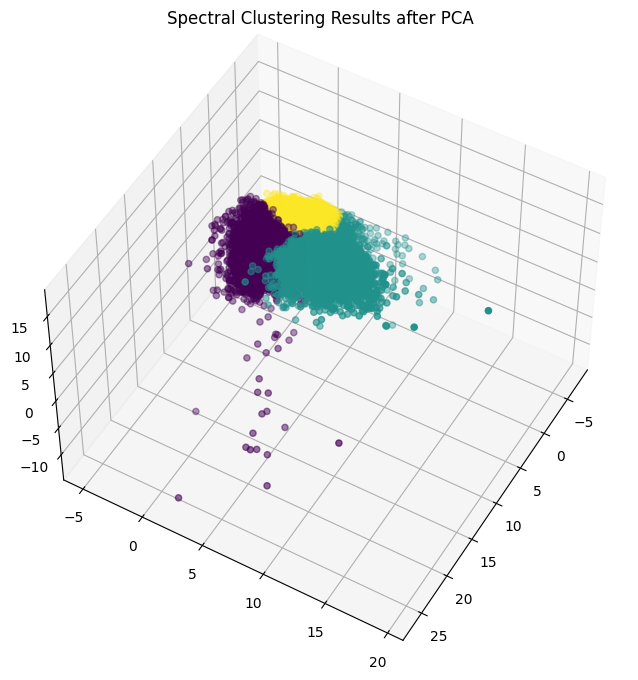

In [ ]:
# Visualize the clustered data in the reduced space
fig = plt.figure(figsize=(10, 8))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2], c=labels, cmap='viridis')
ax.set_title('Spectral Clustering Results after PCA')
ax.view_init(elev=50, azim=30)
plt.show()

## remove correlated features

In [ ]:
elements_to_remove = ['start_terminal','end_terminal']
cluster_column_2 = [item for item in cluster_column if item not in elements_to_remove]

###PCA-2

In [ ]:
# Apply PCA for dimensionality reduction
n_components = 2  # You can adjust this based on the desired number of components
pca_1 = PCA(n_components=n_components)
X_pca_1 = pca_1.fit_transform(df_cleaned[cluster_column_2])

In [ ]:
# Apply Spectral Clustering
n_clusters_1 = 3  # You can adjust this based on the number of clusters in your data
spectral_1 = SpectralClustering(n_clusters=n_clusters_1, affinity='nearest_neighbors', random_state=42)
labels_1 = spectral_1.fit_predict(X_pca_1)

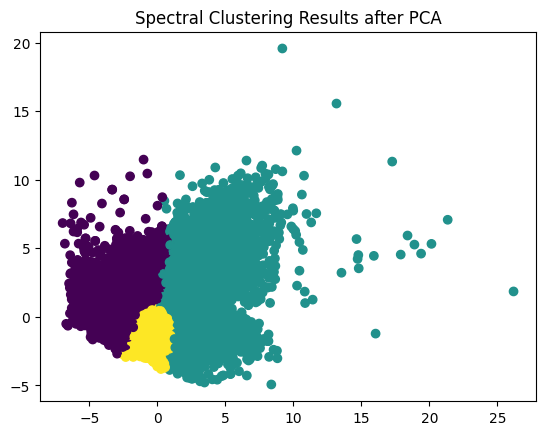

In [ ]:
# Visualize the clustered data in the reduced space
plt.scatter(X_pca_1[:, 0], X_pca_1[:, 1], c=labels_1, cmap='viridis')
plt.title('Spectral Clustering Results after PCA')
plt.show()

###PCA-3

In [ ]:
# Apply PCA for dimensionality reduction
n_components = 3  # You can adjust this based on the desired number of components
pca_2 = PCA(n_components=n_components)
X_pca_2 = pca_2.fit_transform(df_cleaned[cluster_column_2])

In [ ]:
# Apply Spectral Clustering
n_clusters_2 = 3  # You can adjust this based on the number of clusters in your data
spectral_2 = SpectralClustering(n_clusters=n_clusters_2, affinity='nearest_neighbors', random_state=42)
labels_2 = spectral_2.fit_predict(X_pca_2)

In [ ]:
np.unique(labels_2)

array([0, 1, 2], dtype=int32)

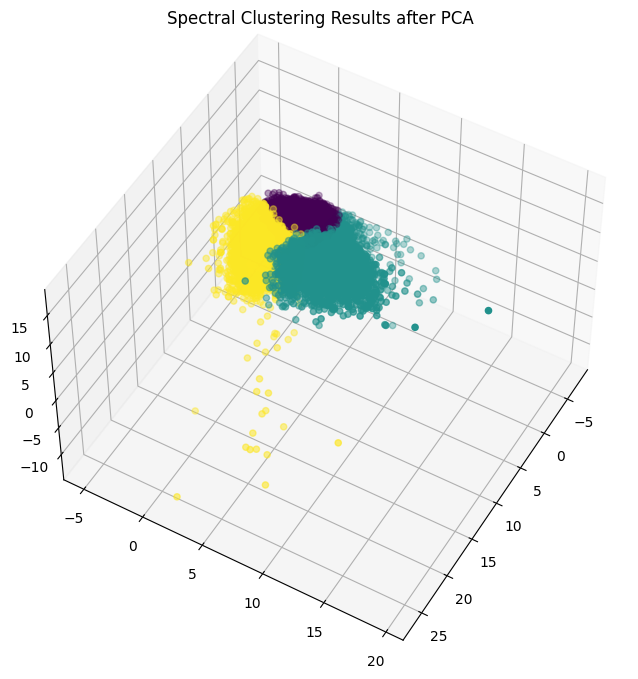

In [ ]:
# Visualize the clustered data in the reduced space
fig_1 = plt.figure(figsize=(10, 8))
# syntax for 3-D projection
ax_2 = plt.axes(projection ='3d')
ax_2.scatter(X_pca_2[:, 0], X_pca_2[:, 1],X_pca_2[:, 2], c=labels_2, cmap='viridis')
ax_2.set_title('Spectral Clustering Results after PCA')
ax_2.view_init(elev=50, azim=30)
plt.show()

In [ ]:
data_copy_2 = data.copy()
df_cleaned_2 = data_copy_2.dropna()
# Reset the index to make it consecutive integers
df_cleaned_2 = df_cleaned_2.reset_index(drop=True)
df_cleaned_2['label'] = labels_2

In [ ]:
download_csv(df_cleaned_2,'cluster_data')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

In [ ]:
pickle.dump(spectral_2,open("spectral_pca-3_class-3.pkl","wb"))

In [ ]:
pickle.dump(pca_2,open("spectral_pca-3_class-3_PCA.pkl","wb"))

In [ ]:
pickle.dump(scaler,open("spectral_pca-3_class-3_scaler.pkl","wb"))

In [ ]:
X_pca_2[:2]

array([[ 3.72073501, -3.05836489,  1.95949823],
       [ 0.6709574 , -1.76930905,  1.64949426]])

In [ ]:
k = spectral_2.fit_predict(X_pca_2[:12])
k

array([0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2], dtype=int32)

In [ ]:
labels_2[:12]